In [ ]:
import sys
models_path = "/home/noam.koren/multiTS/NFT"
if models_path not in sys.path: sys.path.append(models_path)

from dicts import data_to_num_vars_dict
from models.training_functions import get_data, plot_predictions


X_train_noaa, y_train_noaa, _, _, X_test_noaa, y_test_noaa = get_data('noaa', 7, 1, data_to_num_vars_dict['noaa'], series='AEM00041194')
X_train_air_quality, y_train_air_quality, _, _, X_test_air_quality, y_test_air_quality = get_data('air_quality', 5, 1, data_to_num_vars_dict['air_quality'])
X_train_ecg, y_train_ecg, _, _, X_test_ecg, y_test_ecg = get_data('ecg_single', 50, 1, data_to_num_vars_dict['ecg_single'], series='E00001')
X_train_eeg, y_train_eeg, _, _, X_test_eeg, y_test_eeg = get_data('eeg_single', 50, 1, data_to_num_vars_dict['eeg_single'], series='test_0')


/home/noam.koren/multiTS/NFT/models/training_functions.py:112: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # To ensure the title fits
/home/noam.koren/miniconda3/envs/multTS/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


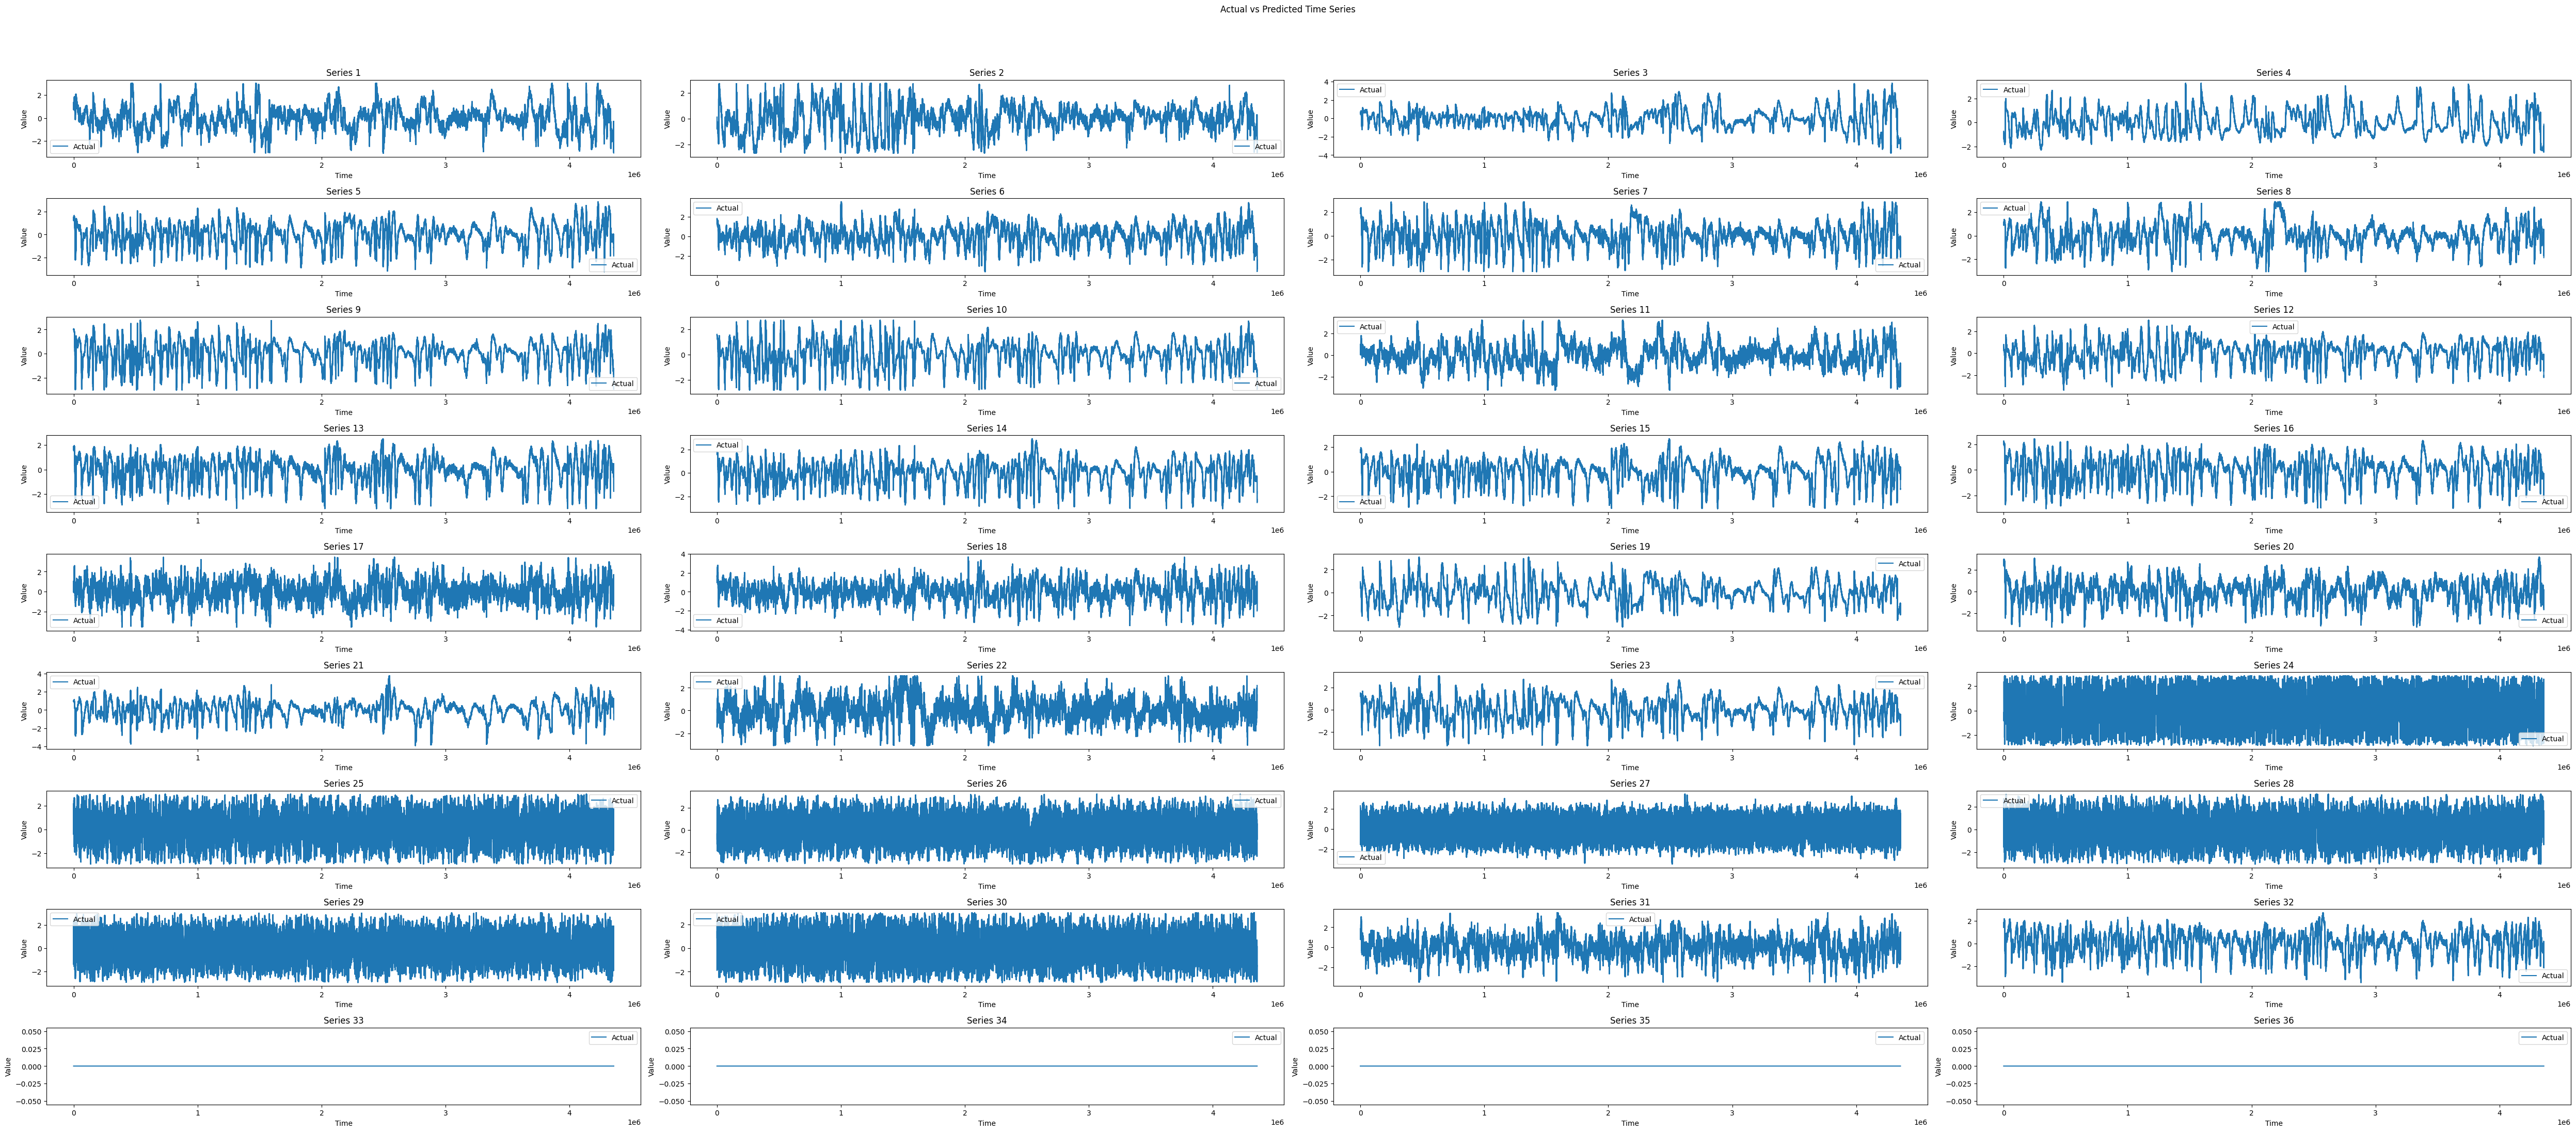

In [4]:
plot_predictions(y=X_train_noaa, predictions=None, horizon=1, n_vars=data_to_num_vars_dict['noaa'], epoch=None, path_to_save_prediction_plots=None)
plot_predictions(y=X_train_air_quality, predictions=None, horizon=1, n_vars=data_to_num_vars_dict['air_quality'], epoch=None, path_to_save_prediction_plots=None)
plot_predictions(y=X_train_ecg, predictions=None, horizon=1, n_vars=data_to_num_vars_dict['ecg_single'], epoch=None, path_to_save_prediction_plots=None)
plot_predictions(y=X_train_eeg, predictions=None, horizon=1, n_vars=data_to_num_vars_dict['eeg_single'], epoch=None, path_to_save_prediction_plots=None)

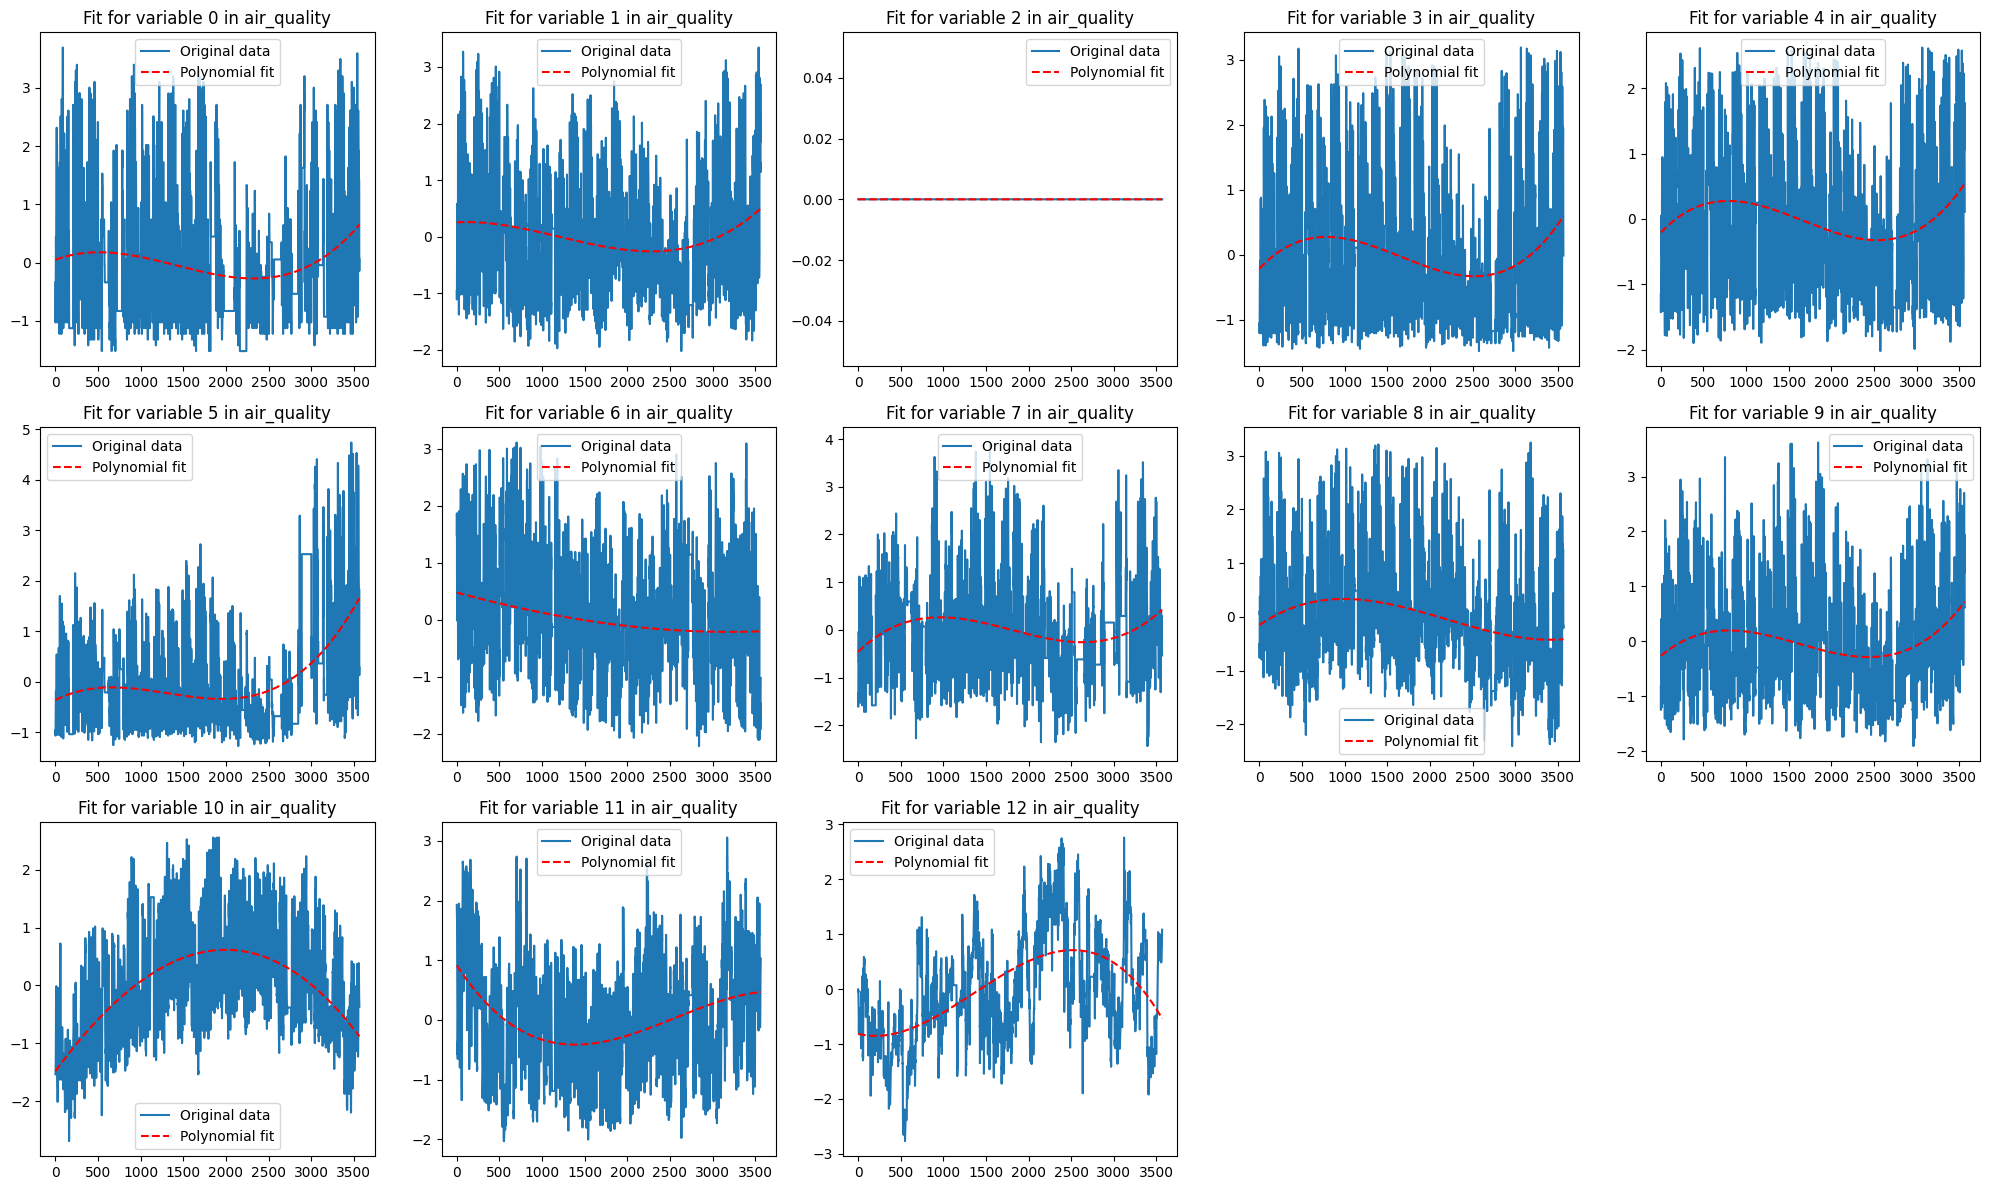

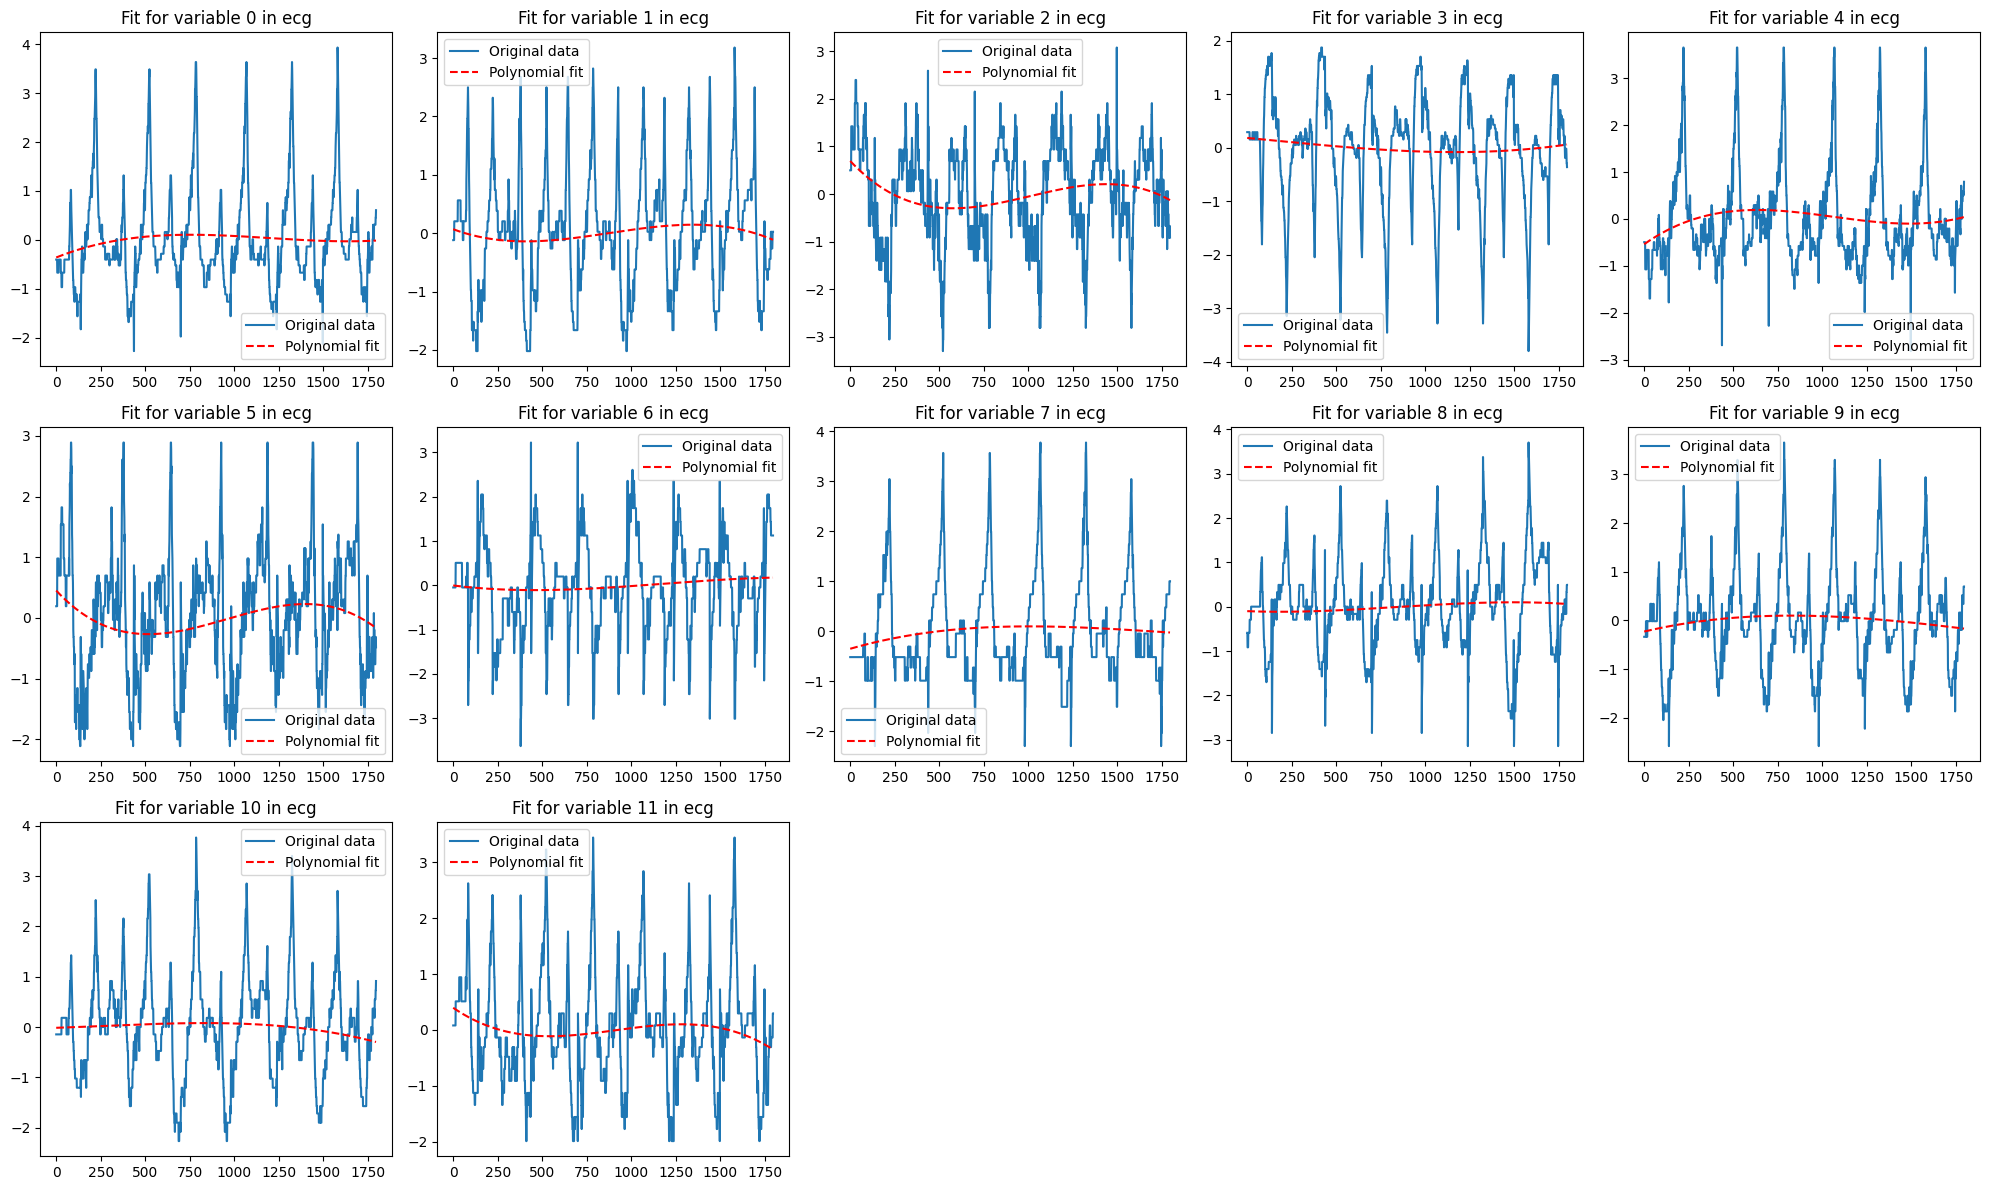

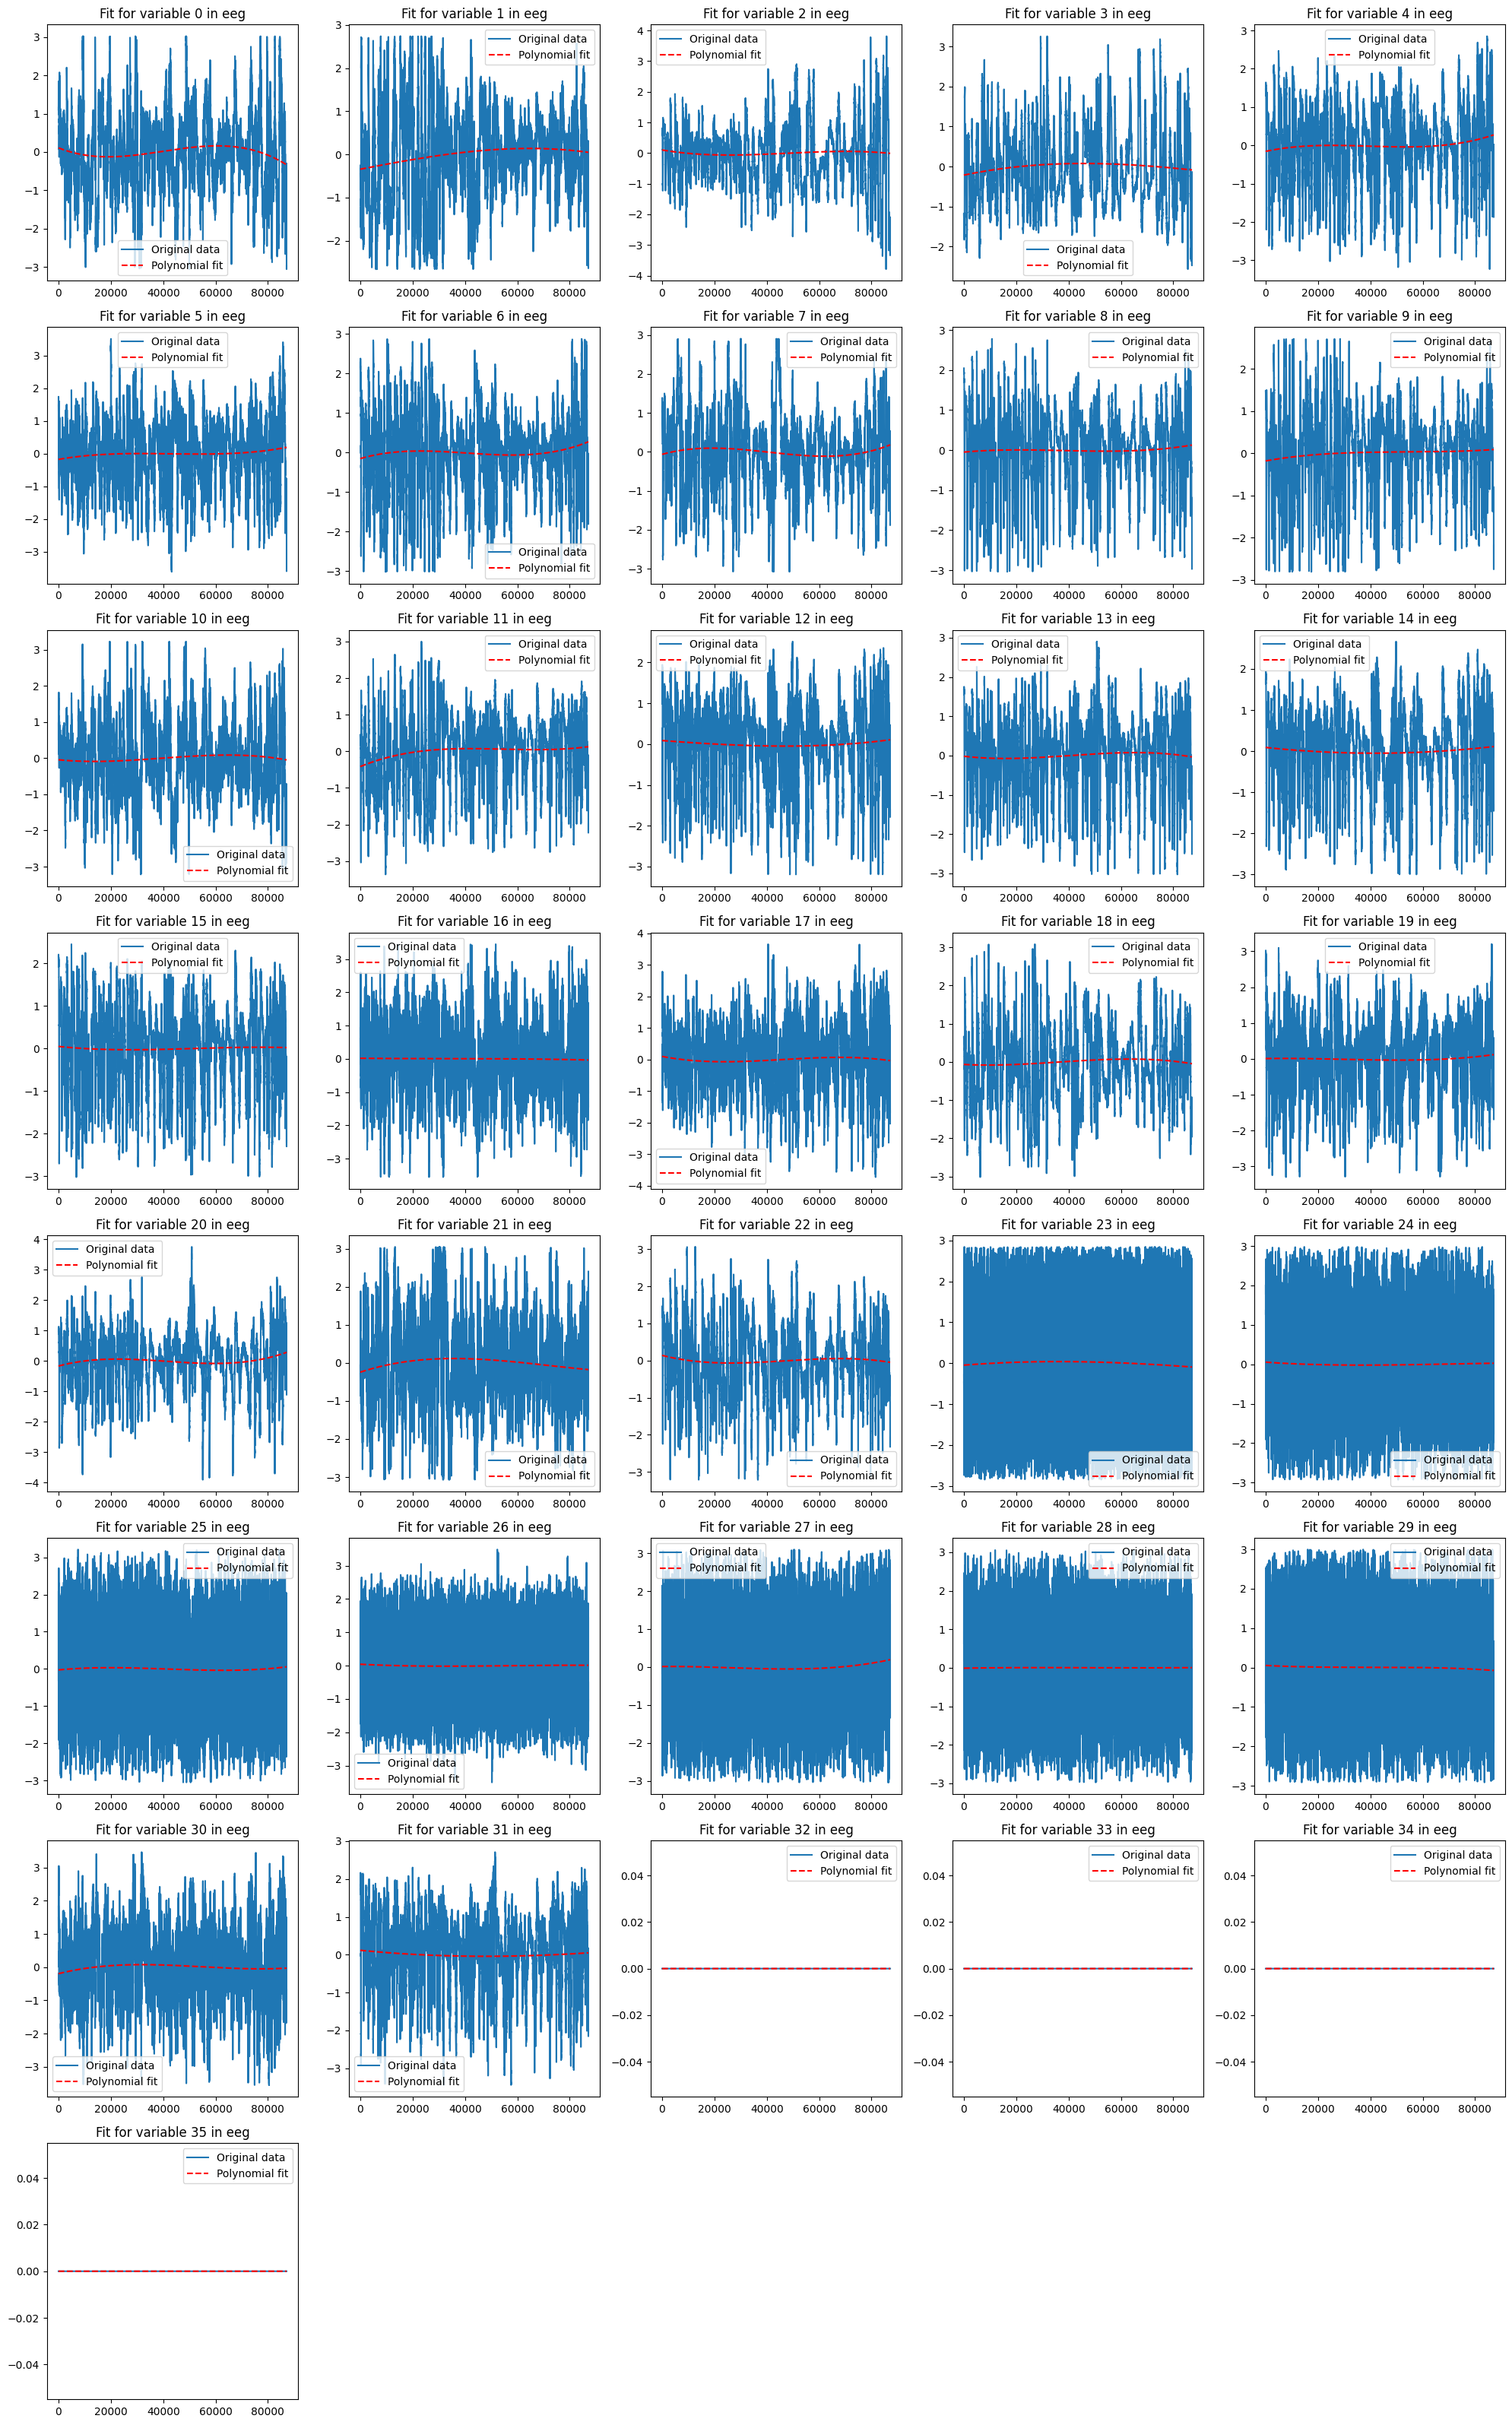

all_mse=[0.989070016983363, 0.8206330555251182, 0.9842623348466408, 0.8853322753287569]


In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

def poly_loss(data):  
    y = globals()[f'y_train_{data}']    
    time = np.array([i for i in range(y.shape[0])])
    degree = 3
    
    mse_lst = []
    num_vars = data_to_num_vars_dict[data]
    # Calculate the number of rows needed for the subplots
    num_rows = (num_vars + 4) // 5  # +4 to handle any remainder less than 5 for an extra row
    plt.figure(figsize=(20, num_rows * 4))  # Adjust figure size based on the number of plots and rows

    # Create a subplot for each variable
    for i in range(num_vars):
        values = np.array(y[:,0,i])
        
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        time_poly = poly_features.fit_transform(time.reshape(-1, 1))
        
        model = LinearRegression()
        model.fit(time_poly, values)

        values_pred = model.predict(time_poly)

        mse = mean_squared_error(values, values_pred)
        # print(f'Mean Squared Error: {mse}')
        mse_lst.append(mse)
        
        # Set up individual subplot; adjust the indexing for subplot arrangement
        ax = plt.subplot(num_rows, 5, i + 1)  # Now arranging in up to 5 columns
        ax.plot(time, values, label=f'Original data')
        ax.plot(time, values_pred, color='red', label=f'Polynomial fit', linestyle='--')
        ax.legend()
        ax.set_title(f"Fit for variable {i} in {data}")
        
    plt.tight_layout()  # Adjust layout so labels don't overlap
    plt.show()  # Display the grouped plots
    
    return mse_lst

all_mse = []
for data in ['noaa', 'air_quality', 'ecg', 'eeg']:
    mse_lst = poly_loss(data)
    all_mse.append(sum(mse_lst) / len(mse_lst))

print(f"all_mse={all_mse}")
